# Fordgobike Dataset Exploration and Visualization

<h4>Temitope Yakub<h4>


    
    


### Introduction

We will investigate Ford GoBike System Dataset and discuss the effect of Three variables ('user_type','Trip_day of the week',and 'duration_min') on number of trips and the relation between them.
    
Like other bike sharing programs, Ford GoBike uses a fleet of strong, durable bikes that are secured into a system of docking stations spread out over the city. The bikes are perfect for one-way travels because they may be unlocked from one station and returned to any other station in the network. The bikes may be used 365 days a year, seven days a week, and 24 hours a day. Riders who sign up as members or buy passes get access to all the bikes in the network.

### Preliminary Wrangling

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [2]:
#reading the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.start_time.max()

'2019-02-28 23:59:18.5480'

In [6]:
#check for  null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We can se we have null values for some columns  like station_name and member_gender.
Removing these rows of theese columns  will remove the other null values. It's like using one stone to kill two birds.


In [7]:
#To check for duplicates
df.duplicated().sum()

0

No duplicate  in our dataset

In [8]:
#To see the summary statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

We need to change the time data types, and create more columns from the dateime columns for hours, month and day

In [10]:
#creating a copy of the dataset
df_clean = df.copy()

##### Dealing with null values 


In [11]:
# Remove rows that does not have station id
df_clean = df_clean[df['start_station_id'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183215 non-null  int64  
 1   start_time               183215 non-null  object 
 2   end_time                 183215 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183215 non-null  float64
 6   start_station_longitude  183215 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183215 non-null  float64
 10  end_station_longitude    183215 non-null  float64
 11  bike_id                  183215 non-null  int64  
 12  user_type                183215 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [12]:
# Remove rows that does not have member gender
df_clean = df_clean[df['member_gender'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

<ipython-input-12-66e23b8159af>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[df['member_gender'].isnull() == False]


In [13]:
#To check for null values again
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

We have no null values again.

In [14]:
# Change start_time and end_time to datetime format
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [15]:
# Extract dayofweek, month, and hours information from the start_time
df_clean['start_dayofweek']= df_clean['start_time'].dt.strftime('%a')
df_clean['start_hour']= df_clean['start_time'].dt.hour


#conversion of duration sec to minutes
df_clean['duration_min'] = df_clean['duration_sec']/60

We have formed added four additional columns

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [17]:
df_clean['start_dayofweek'].value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_dayofweek, dtype: int64

##### Conversion of start_dayofweek to category variable

In [18]:
# Convert the start_dayofweek to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_dayofweek'] = df_clean['start_dayofweek'].astype(ordered_weekdays)



# to category
df_clean.user_type = df_clean.user_type.astype('category')



In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [20]:
#calculate member_age from member_birth_year
df_clean['member_age'] = 2022 - df_clean['member_birth_year']

AS we can see, we need to change the member_birth_year and age from float to int

In [21]:
df_clean['member_age'] = df_clean['member_age'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

##### Observations

After a simple cleaning, the dataset contains 174952 rows and 21 columns

trip duration: how long the trip took in seconds
start time/end time: start/end date/time for the bike rides.
stations: start/end station, name, geolocation (latitude/longitude)
anonymized customer data: gender, birth date and user type
rented bikes: bike id

The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:

rental time: hour of the day, weekday
customer: age


#### Features Interest

start_time, to find bikes usage by hour, week, day, and month.
user_type, to find the differences in bikes usage between subscribers and customers.


#### Supported Features

The supported features are bikes_id, start_time, user_type, and age.


In [23]:
# labels to use in plots
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# color to use in plots 
base_color = sn.color_palette()[0]

### Univariate Exploration

I'll start by looking at the duration_minutes as the main variable of interest. To determine the average bike trips as a unit of time.


### Trip Durations

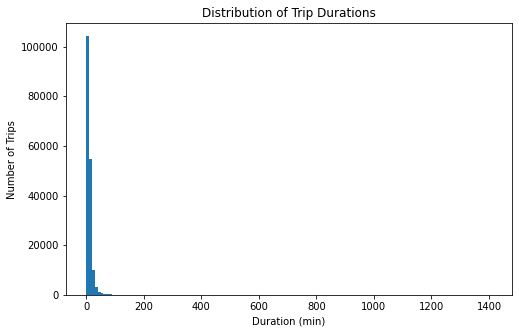

In [24]:
binsize = 10
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.show()



From the chart above, You will notice the chart is distributed and  not spread with many points having low values and a long tail of data points having high values. 
Thus, a logarithmic scale transformation will be applied.




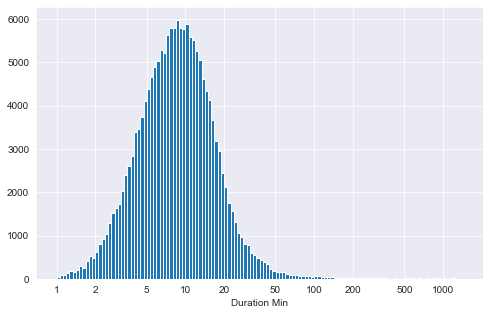

In [53]:
#creating a plot for histogram with logarithmic scale transformation
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)

#size
plt.figure(figsize=[8, 5]);

plt.hist(data = df_clean, x = 'duration_min', bins = bins);
plt.xscale('log');

plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]);
plt.xlabel('Duration Min');

In [26]:
df_clean['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

The average bike trip is 12 minutes. 

### Count of User Type

<AxesSubplot:xlabel='user_type', ylabel='count'>

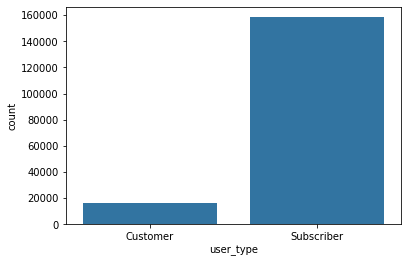

In [27]:
sn.countplot(data=df_clean,x='user_type', color= base_color)

Subcribers are more than the Customers

Count of Bikers in

<AxesSubplot:xlabel='start_dayofweek', ylabel='count'>

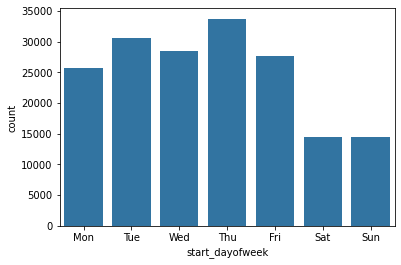

In [28]:
sn.countplot(data=df_clean,x='start_dayofweek', color= base_color)

### Age Distribution

In [29]:
df_clean['member_age'].describe()

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: member_age, dtype: float64

<AxesSubplot:ylabel='member_age'>

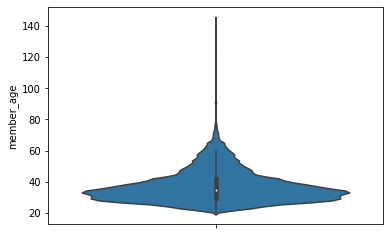

In [31]:
sn.violinplot(data=df_clean, y='member_age')

from the chart above there are outliers above 60. We will treat the outliers  by seeting the age not to be 60



In [32]:
# Let's remove outliners. Only keep record with member_age below 60.
df_clean = df_clean[df_clean['member_age'] <= 60]

In [33]:
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dayofweek,start_hour,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,17,869.75,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,12,1030.90,50


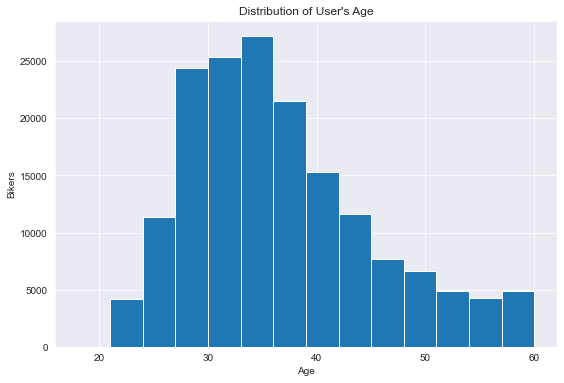

In [52]:
#bin size
binsize = 3

#the plot size
plt.figure(figsize=[9, 6])


bins = np.arange(18, df_clean['member_age'].max()+binsize, binsize)
plt.hist(data = df_clean, x = 'member_age', bins = bins);
plt.title("Distribution of User's Age")
plt.xlabel('Age')
plt.ylabel('Bikers')
plt.show()

Most bikers are between the age 25 and 35. There is a steadly decline in usage from age 35.

### User's Participation

In [35]:
#to get the count of users
user_counts =df_clean.value_counts(["user_type"]).reset_index(name= "counts")
user_counts

#To get the percentage
user_counts['Percentage %'] = round(user_counts.counts / user_counts.counts.sum() * 100, 2)

user_counts

,user_type,counts,Percentage %
0,Subscriber,152949,90.41
1,Customer,16222,9.59


#####  Let's plot donughrt chart

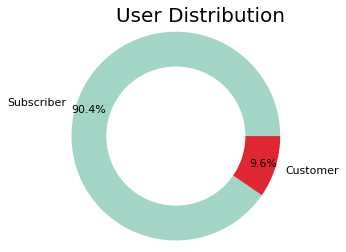

In [36]:
user_percentage = user_counts["Percentage %"].to_list()
plt.title('User Distribution', fontsize=20, loc='Right')
plt.pie(user_percentage, colors=['#a2d5c6','#df2631'], labels= ["Subscriber", "Customer"], 
        radius=1.2, autopct= "%0.1f%%", pctdistance = 0.88,
        textprops = {"size" : 11, "color" : "#000000"}, explode= [0.00, 0.00])

centre_circle = plt.Circle((0,0), 0.8, fc = "w")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Most users are actually subscribers than actual customers who represents only 9.6% of total users.

### Daily Ride Usage

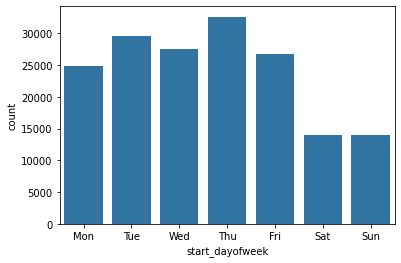

In [37]:
#creating a plot to visualize the days
#base color has been declared earlier
sn.countplot(data = df_clean, x = 'start_dayofweek', color = base_color);

The service is most used on Thursday with over 35,000. The usage decreases significantly on the weekends.

###  Hours that Users used the most bikers

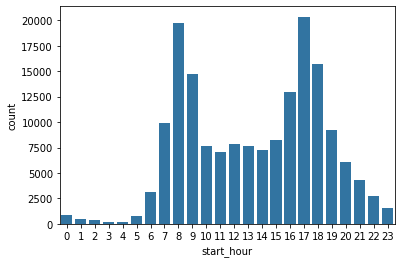

In [38]:
sn.countplot(data = df_clean, x = 'start_hour', color = base_color);

8:00 AM and 5:00 PM are the two peak hours which have most bikers.

### The Gender Distribution

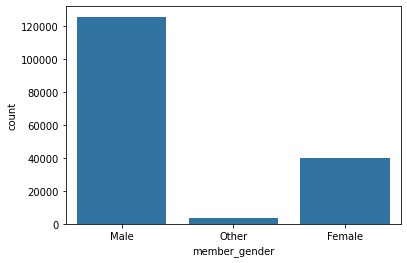

In [39]:

sn.countplot(data = df_clean, x = 'member_gender', color = base_color);

Males are outpacing the female and other genders in bike ride usage. Male represents over 120,000 with females representing a third of that amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. The bike duration variable took on a large range of values. I did have to perform a log transform. The data looked    bimodal under the log transformation with one peak between 8 and 12 minutes.
2. User with Age between 25 and 35 are making top of number of trips

3.  Very few rides lasted more than one hour.
4. The majority of bike users were subscribers (80.6%).


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?




1. There was an outlier so, we needed to make a zoom in and limit the number of minutes to 60 to get better insights

2. I did a further cleaning with the limiting the age to be from 15 to 60 to exclude another minor outlier to get better insights.



## Bivariate Exploration


I'II be using faceting beacuse i have a lot of categories variable i want to breakdown

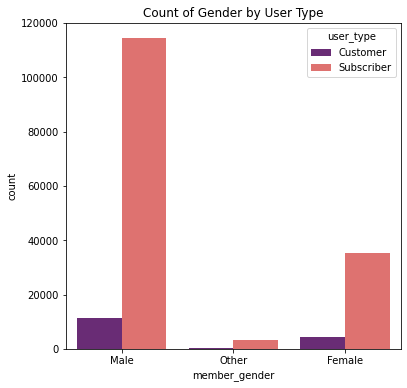

In [40]:
plt.figure(figsize = [6, 6]);
sn.countplot(data = df_clean, x = 'member_gender', 
             hue = 'user_type', palette = 'magma').set(title = 'Count of Gender by User Type');

From the chart above, we can see Male Subscriber  are more than the Female Subscriber, like wise Customer.

### User Type vs Duration Minutes

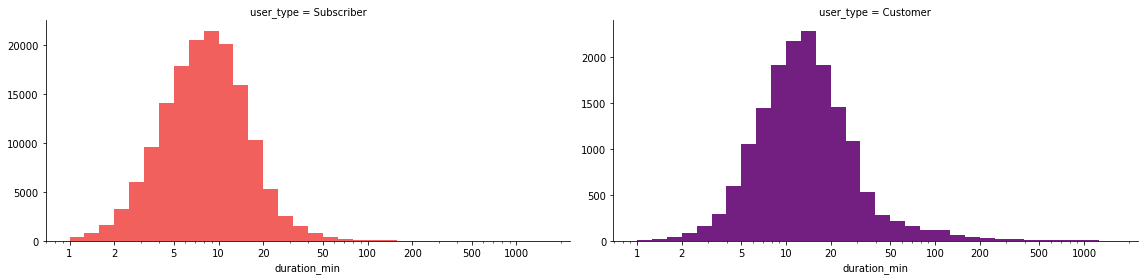

In [41]:
# facetting histograms of duration_min against user_type
user_order = df_clean['user_type'].value_counts().index


bin_edges = 10 ** np.arange(0.0, np.log10(df_clean.duration_min.max())+0.1, 0.1)
f = sn.FacetGrid(data = df_clean, col = 'user_type', hue='user_type', palette='magma' ,height=4, aspect=2, 
                 col_order= user_order, sharey=False)
f.map(plt.hist, "duration_min", bins = bin_edges)
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs);


Subscribers mostly rode bikes for (8-12) minutes, while customers mostly rode them for (10-20) minutes.
Also, customers rides were more likely to last more than one hour compared to subscribers.

###  Daily Ride Usage by Gender

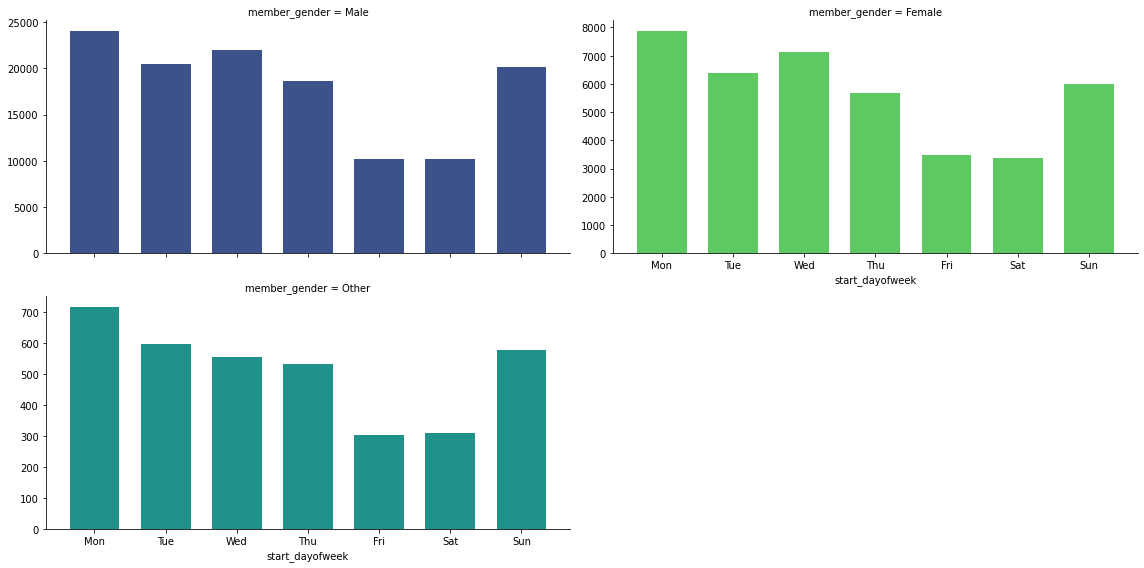

In [42]:
# facetting histograms of start_weekday against gender


#fig, ax = plt.subplots(ncols = 2, nrows = 2 , figsize = [15,10])
#The count of member_gender
gender_order = df_clean['member_gender'].value_counts().index
bin_edges = np.arange(-0.5, 6.5+1, 1)

f= sn.FacetGrid(data = df_clean, col = 'member_gender',hue='member_gender', palette='viridis' , height=4, aspect=2, 
                 col_order = gender_order, col_wrap=2,  sharey=False)

f.map(plt.hist, 'start_dayofweek', bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(0, 6+1, 1), weekday_labels);

From the chart above, we can see Females bikers rides longer than Male. Obviously, Monday is always the busiest day. I have no doubt about that as we all know Mondays are always busy.

Friday is the lowest.

### Daily Ride Users by User's Type

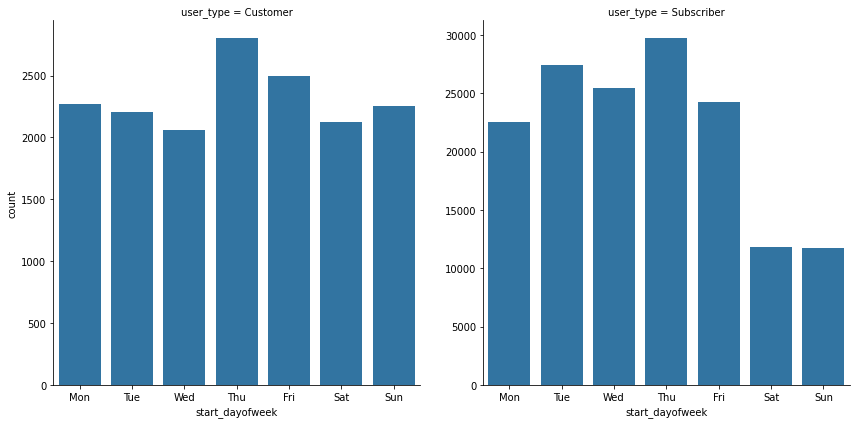

In [43]:
sn.catplot(data=df_clean, x='start_dayofweek', col="user_type", order = weekday_labels, kind='count', 
           sharey = False, color = base_color, height = 6);

From the chart above , Subscribers mostly used bikes on workdays (Monday - Friday), while customers bikes usage was about the same for the whole week.

Therefore, this shows that subscribers doesn't rides on weekend while customers rides on weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?




1. Subscribers tends to rent bikes on working days while Customers tends to rent more in the weekend holiday (Saturday and Sunday) for longer duration.

2. Subscribers tends to rent bikes for shorter duration while Customers tends to rent bikes for longer duration.
   
3. Gender Differnce does not have any effect on number of trips through the days of week.

4. Subscribers mostly rode bikes for (8-12) minutes, while customers mostly rode them for (10-19) minutes.

5. Male Subscriber  are more than the Female Subscriber, like wise Customer.



###  Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Males tends to have a slightly shorter trips’ duration than females.



### Multivariate Exploration

#### Trip duration on a weekday for each User type



Since most rides didn't exceed an hour, I will just keep the rides with duration_minutes <= 60 in this part, to get a more accurate duration_minutes mean.



In [44]:
df_clean_60 = df_clean[df_clean.duration_min <= 60]

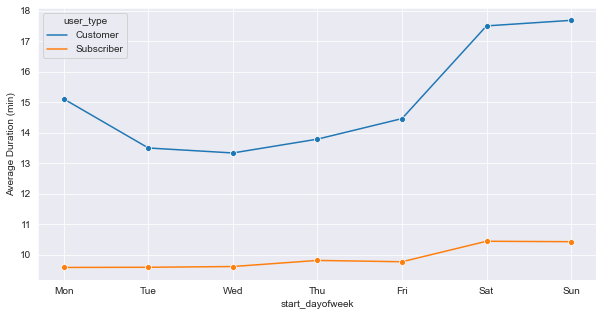

In [45]:
user_weekday_avg_mint = df_clean_60.groupby(['user_type','start_dayofweek']).duration_min.mean()
user_weekday_avg_mint = user_weekday_avg_mint.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sn.set_style('darkgrid')
sn.lineplot(data = user_weekday_avg_mint, x='start_dayofweek', y='duration_min', hue='user_type', marker='o')
plt.xticks(np.arange(0,7), weekday_labels)
plt.ylabel('Average Duration (min)');

Both of Users type have a longer trip duration on weekend in relative to their trips during other week days.

It appears that customers hire bikes for amusement and enjoyment since they keep them longer than subscribers do, especially on weekends (Saturday and Sunday).


#### Trip duration on a weekday for each gender type

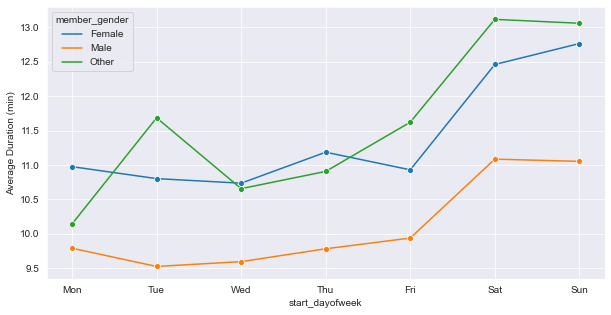

In [46]:
user_weekday_avg_mint = df_clean_60.groupby(['member_gender','start_dayofweek']).duration_min.mean()
user_weekday_avg_mint = user_weekday_avg_mint.reset_index()

#labels
#weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# plot a line plot with colors based on user_type
sn.set_style('whitegrid')
plt.figure(figsize=[10,5])
sn.set_style('darkgrid')
sn.lineplot(data = user_weekday_avg_mint, x='start_dayofweek', y='duration_min', hue='member_gender', marker='o')
plt.xticks(np.arange(0,7), weekday_labels)
plt.ylabel('Average Duration (min)');

Not surprising the trip duration start trending up on the weekends from Thursdays to Saturdays. Males still have the shortest bike trip.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?




Customers rides lasted longer than subscribers rides on every week day.

#### Were there any interesting or surprising interactions between features?

Customers were more likely to use bikes for a longer period than subscribers, especially on weekends.

In [47]:
# save cleaned data 
df_clean.to_csv('clean_file.csv', index=False)

#### Conclusion

1. Most bikers are between the age 25 and 35. There is a steadly decline in usage from age 35.
2. Most users are actually subscribers than actual customers who represents only 9.6% of total users.
3. The service is most used on Thursday. The usage decreases significantly on the weekends.
4. Subscribers mostly rode bikes for (8-12) minutes, while customers mostly rode them for (10-20) minutes.
5. Customers rides were more likely to last more than one hour compared to subscribers.
6. It appears that customers hire bikes for amusement and enjoyment since they keep them longer than subscribers do,      especially on weekends (Saturday and Sunday).






#### Refereneces

1. https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
2. https://hookagency.com/blog/website-color-schemes-2020/
3. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike 
4. https://stackoverflow.com/questions/61291741/passing-list-likes-to-loc-or-with-any-missing-labels-is-no-longer-    supported
5.  https://rise.readthedocs.io/en/stable/exportpdf.html
6. https://www.analyticsvidhya.com/blog/2020/04/statistics-data-science-normal-distribution/
7. https://practicaldatascience.co.uk/data-science/how-to-visualise-correlations-using-pandas-and-seaborn
